Работа осуществляется с базой акции лукойла.

1. Обучите простую полносвязную сеть для прогнозирования временного ряда. Используйте только столбец close и визуализируйте результат.

2. Обучите такую же архитектуру сети на прогнозирование на 10 шагов вперёд прямым способом и визуализируйте результат.

3. Постройте графики сравнения предсказания с оригинальным сигналом по всем 10 шагам предсказания (10 графиков на разных отдельных осях).

4. Сделайте те же задания с другой сетью, которая будет использовать Conv1D или LSTM слой

#Прогнозирование акций Лукойл




In [ ]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Считываем данные с помощью pandas
base_data = pd.read_csv('/content/drive/MyDrive/Базы/18_19.csv', sep=';')

In [ ]:
#Выводим пять первых строк
base_data.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427


In [ ]:
#Выцепялем numpy значения .values
#И выводим нулевой
txt = base_data.values[0]
print(txt)

['03.01.2018' '10:00:00' 3341.0 3356.0 3340.0 3355.0 6088]


In [ ]:
base_data16 = pd.read_csv('/content/drive/MyDrive/Базы/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/MyDrive/Базы/18_19.csv', sep=';')
data16_17 = base_data16['CLOSE'].copy()
data18_19 = base_data18['CLOSE'].copy()

In [ ]:
data16_17.shape[0]

263925

In [ ]:
# Выводим параметры одного файла
d = data18_19
print(len(d)) # Сколько есть записей
#print(len(d.iloc[0])) # Длина одной строки данных
print(d.iloc[0]) # Пример первой строки данных

217947
3355.0


In [ ]:
# Объединяем базы из двух файлов
data = data16_17.copy()                 # Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) # Присоединяем к ней вторую базу
data = np.array(data)                   # Превращаем в numpy массив

In [ ]:
data = data.reshape(-1,1)

In [ ]:
# Сравниваем размеры
print(len(data16_17)) # Выводим размер первой базы
print(len(data18_19)) # Выводим размер второй базы
print(len(data))      # Выводим размер суммарной базы

263925
217947
481872


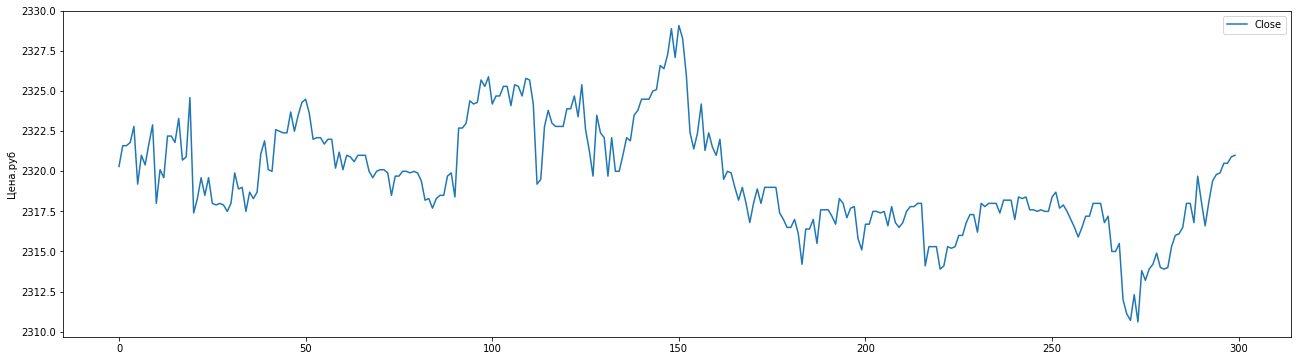

In [ ]:
#Отображаем исходные от точки start и длинной stop
start = 100            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
length = 300 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Close']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
plt.figure(figsize=(22,6))
for i in range(1):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()



### Использование TimeseriesGenerator

In [ ]:
import numpy as np # Подключаем numpy
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Подлкючаем модуль TimeseriesGenerator

In [ ]:
test_array = np.arange(50) # Создаем тестовый массив из полседовательности чисел от 0 до 50
print(test_array) # Выводим на экран созданный массив

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [ ]:
x_train = test_array # Создаем x_train
y_train = test_array # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=5
    )

In [ ]:
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
y_train: [10 11 12 13 14]

Батч № 1
x_train: [[ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
y_train: [15 16 17 18 19]

Батч № 2
x_train: [[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]]
y_train: [20 21 22 23 24]

Батч № 3
x_train: [[15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]]
y_train: [25 26 27 28 29]

Батч № 4
x_train: [[20 21 22 23 24 25 26 27 28 29]
 [21 22 23 24 25 26 27 28 29 30]
 [22 23 24 25 26 27 28 29 30 31]
 [23 24 25 26 27 28 29 30 31 32]
 [24 2

In [ ]:
x_train = test_array[:-1] # Создаем x_train
y_train = test_array[1:] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [11]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [12]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [13]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [14]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [15]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [16]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [17]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [18]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [19]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [20]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [21]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [22]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [23]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [24]

Батч № 14
x_train: [[14 15 16 17 18 19 20 21 22 23]]
y_train: [25]



In [ ]:
x_train = test_array # Создаем x_train
y_train = [[x, x+1] for x in range(50)] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [[10 11]]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [[11 12]]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [[12 13]]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [[13 14]]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [[14 15]]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [[15 16]]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [[16 17]]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [[17 18]]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [[18 19]]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [[19 20]]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [[20 21]]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [[21 22]]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [[22 23]]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [[23 24]]

In [ ]:
y_train = [[x, x+1] for x in range(50)]
print(y_train)

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [48, 49], [49, 50]]


### Функция загрузки данных




In [ ]:
#Формируем параметры загрузки данных

xLen = 300                      #Анализируем по 300 прошедшим точкам 
valLen = 30000                  #Используем 30.000 записей для проверки

trainLen = data.shape[0]-valLen # Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data[:trainLen,0],(-1,1)), np.reshape(data[trainLen+xLen+2:,0],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=20)

In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 300, 1) (20, 1)


## Полносвязная сеть




## Визуализация результатов


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  
# Функция расчёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=300, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Dense-сетка

### Эксп. №1

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(150,input_shape = (xLen,1), activation="relu" )) # 1 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300, 150)          300       
                                                                 
 flatten_5 (Flatten)         (None, 45000)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 45001     
                                                                 
Total params: 45,301
Trainable params: 45,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22579/22579 [==============================] - 101s 4ms/step - loss: 3.8649e-04 - val_loss: 2.5031e-05
Epoch 2/50
22579/22579 [==============================] - 97s 4ms/step - loss: 6.4607e-05 - val_loss: 0.0017
Epoch 3/50
22579/22579 [==============================] - 97s 4ms/step - loss: 3.8066e-05 - val_loss: 4.2172e-05
Epoch 4/50
22579/22579 [==============================] - 96s 4ms/step - loss: 2.8618e-05 - val_loss: 3.2673e-05
Epoch 5/50
22579/22579 [==============================] - 97s 4ms/step - loss: 2.7909e-05 - val_loss: 1.0737e-05
Epoch 6/50
22579/22579 [==============================] - 96s 4ms/step - loss: 2.1486e-05 - val_loss: 1.9601e-05
Epoch 7/50
22579/22579 [==============================] - 95s 4ms/step - loss: 1.8822e-05 - val_loss: 6.8007e-05
Epoch 8/50
22579/22579 [==============================] - 98s 4ms/step - loss: 1.8036e-05 - val_loss: 1.1525e-04
Epoch 9/50
22579/22579 [==============================] - 99s 4ms/step - loss: 1.6296e-05 - val_los

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

lrPlato = ReduceLROnPlateau(monitor='val_mae', 
                            factor=0.2, 
                            patience=7, 
                            verbose=0, 
                            mode='auto', 
                            min_delta=0.000001, 
                            cooldown=10, 
                            min_lr=1e-6) 



In [ ]:
import time

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen, 
                    callbacks = [lrPlato]
                     )

Epoch 1/20
22579/22579 [==============================] - 100s 4ms/step - loss: 3.0471e-06 - val_loss: 4.8365e-06 - lr: 1.0000e-05
Epoch 2/20
22579/22579 [==============================] - 101s 4ms/step - loss: 3.0233e-06 - val_loss: 6.9519e-06 - lr: 1.0000e-05
Epoch 3/20
22579/22579 [==============================] - 102s 4ms/step - loss: 2.9988e-06 - val_loss: 5.1334e-06 - lr: 1.0000e-05
Epoch 4/20
22579/22579 [==============================] - 100s 4ms/step - loss: 2.9823e-06 - val_loss: 4.2957e-06 - lr: 1.0000e-05
Epoch 5/20
22579/22579 [==============================] - 99s 4ms/step - loss: 2.9609e-06 - val_loss: 4.4926e-06 - lr: 1.0000e-05
Epoch 6/20
22579/22579 [==============================] - 99s 4ms/step - loss: 2.9617e-06 - val_loss: 4.2009e-06 - lr: 1.0000e-05
Epoch 7/20
22579/22579 [==============================] - 99s 4ms/step - loss: 2.9439e-06 - val_loss: 4.1740e-06 - lr: 1.0000e-05
Epoch 8/20
22579/22579 [==============================] - 99s 4ms/step - loss: 2.9240e

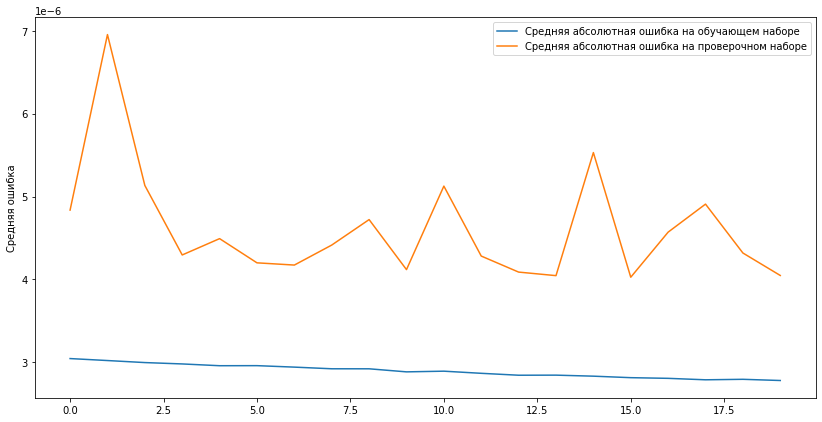

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
chkpt = ModelCheckpoint('model.h5', 
                        monitor='val_mae', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='auto')
lrPlato = ReduceLROnPlateau(monitor='val_mae', 
                            factor=0.2, 
                            patience=5, 
                            verbose=0, 
                            mode='auto', 
                            min_delta=0.0001, 
                            cooldown=20, 
                            min_lr=1e-7) 

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-6))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen, 
                    callbacks = [lrPlato, chkpt] 
                    )

Epoch 1/20
22579/22579 [==============================] - 128s 4ms/step - loss: 2.5626e-06 - val_loss: 3.9461e-06 - lr: 1.0000e-06
Epoch 2/20
22579/22579 [==============================] - 101s 4ms/step - loss: 2.5622e-06 - val_loss: 3.9381e-06 - lr: 1.0000e-06
Epoch 3/20
22579/22579 [==============================] - 101s 4ms/step - loss: 2.5596e-06 - val_loss: 4.1892e-06 - lr: 1.0000e-06
Epoch 4/20
22579/22579 [==============================] - 98s 4ms/step - loss: 2.5580e-06 - val_loss: 3.9569e-06 - lr: 1.0000e-06
Epoch 5/20
22579/22579 [==============================] - 98s 4ms/step - loss: 2.5566e-06 - val_loss: 3.9401e-06 - lr: 1.0000e-06
Epoch 6/20
22579/22579 [==============================] - 96s 4ms/step - loss: 2.5541e-06 - val_loss: 3.9625e-06 - lr: 1.0000e-06
Epoch 7/20
22579/22579 [==============================] - 97s 4ms/step - loss: 2.5512e-06 - val_loss: 3.9561e-06 - lr: 1.0000e-06
Epoch 8/20
22579/22579 [==============================] - 97s 4ms/step - loss: 2.5540e-

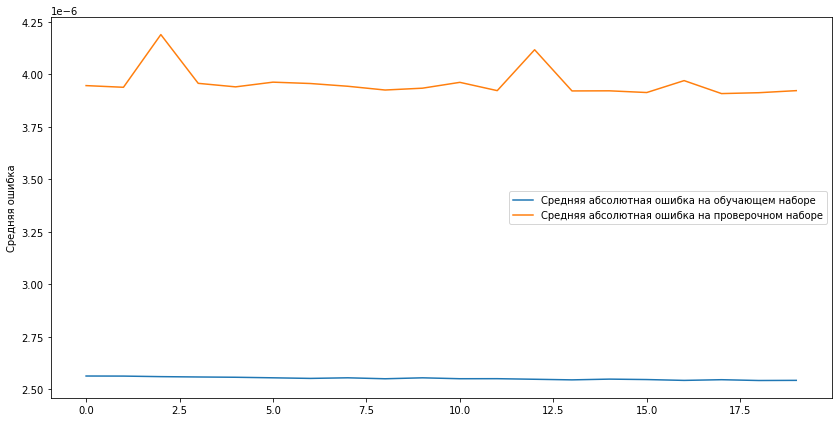

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

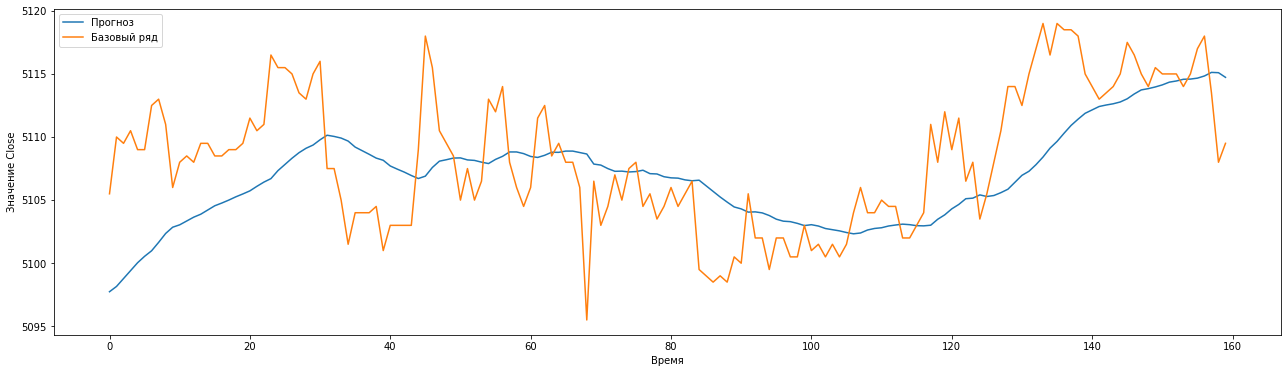

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


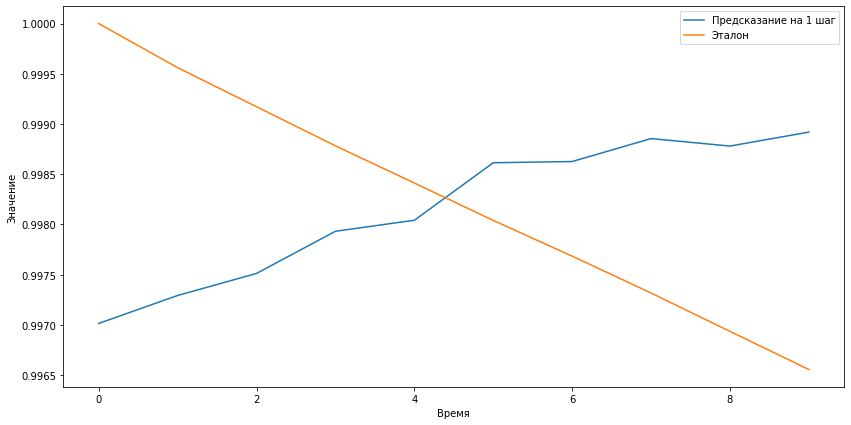

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 10, predVal, yValUnscaled)

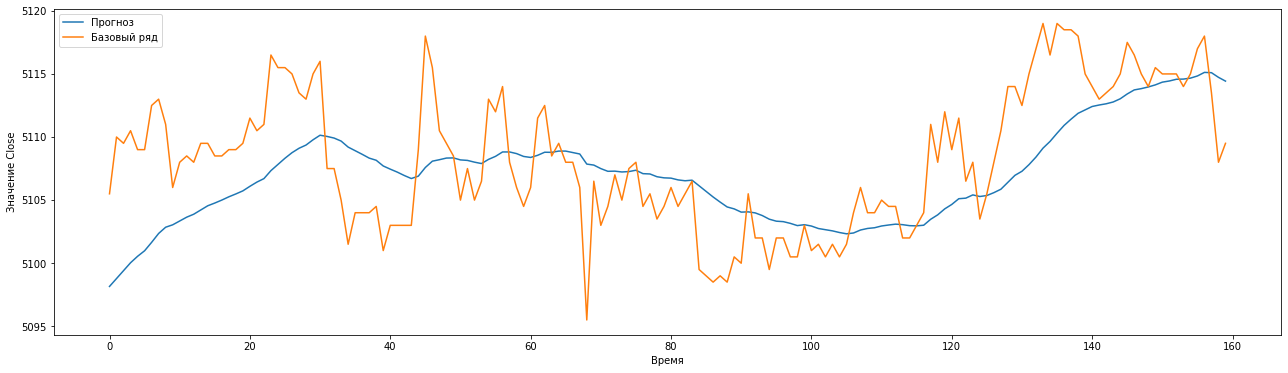

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


In [ ]:
test_array10 = np.arange(150) # Создаем тестовый массив из полседовательности чисел от 0 до 50
print(test_array10) # Выводим на экран созданный массив

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


In [ ]:
x_train10 = test_array10 # Создаем x_train
y_train10 = [[x, x+1, x+2, x+3, x+4, x+5, x+6, x+7, x+8, x+9] for x in range(150)] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train10,
    y_train10,
    length= 50,
    sampling_rate=1,
    stride=10,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49]]
y_train: [[50 51 52 53 54 55 56 57 58 59]]

Батч № 1
x_train: [[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
  34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
  58 59]]
y_train: [[60 61 62 63 64 65 66 67 68 69]]

Батч № 2
x_train: [[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
  44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
  68 69]]
y_train: [[70 71 72 73 74 75 76 77 78 79]]

Батч № 3
x_train: [[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
  54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
  78 79]]
y_train: [[80 81 82 83 84 85 86 87 88 89]]

Батч № 4
x_train: [[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
  64 65 66 67 68 69 70 71 72

In [ ]:
#Формируем параметры загрузки данных

xLen = 300                      #Анализируем по 300 прошедшим точкам 
valLen = 30000                  #Используем 30.000 записей для проверки

trainLen = data.shape[0]-valLen # Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain10, xTest10 = data[:trainLen], data[trainLen+xLen+2:]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain10)
xTrain10 = xScaler.transform(xTrain10)
xTest10 = xScaler.transform(xTest10)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain10, yTest10 = np.reshape(data[:trainLen,0],(-1,1)), np.reshape(data[trainLen+xLen+2:,0],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain10)
yTrain10 = yScaler.transform(yTrain10)
yTest10 = yScaler.transform(yTest10)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain10, yTrain10,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest10, yTest10,
                               length=xLen, stride=1,
                               batch_size=20)

In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 300, 1) (20, 1)


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest10, yTest10,
                               length=300, sampling_rate=1,
                               batch_size=len(xTest10)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(150,input_shape = (xLen,1), activation="relu" )) # 1 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(10, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300, 150)          300       
                                                                 
 flatten (Flatten)           (None, 45000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 45001     
                                                                 
Total params: 45,301
Trainable params: 45,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=20, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
22579/22579 [==============================] - 163s 7ms/step - loss: 1.1788e-05 - val_loss: 7.0643e-06
Epoch 2/20
22579/22579 [==============================] - 160s 7ms/step - loss: 1.0644e-05 - val_loss: 2.5864e-05
Epoch 3/20
22579/22579 [==============================] - 162s 7ms/step - loss: 1.0932e-05 - val_loss: 8.9050e-06
Epoch 4/20
22579/22579 [==============================] - 161s 7ms/step - loss: 1.0681e-05 - val_loss: 1.8413e-05
Epoch 5/20
22579/22579 [==============================] - 161s 7ms/step - loss: 1.0032e-05 - val_loss: 1.7904e-05
Epoch 6/20
22579/22579 [==============================] - 162s 7ms/step - loss: 9.6018e-06 - val_loss: 7.8246e-06
Epoch 7/20
22579/22579 [==============================] - 161s 7ms/step - loss: 9.2444e-06 - val_loss: 1.3696e-05
Epoch 8/20
22579/22579 [==============================] - 163s 7ms/step - loss: 8.9500e-06 - val_loss: 2.1628e-05
Epoch 9/20
22579/22579 [==============================] - 157s 7ms/step - loss: 8.4664e-

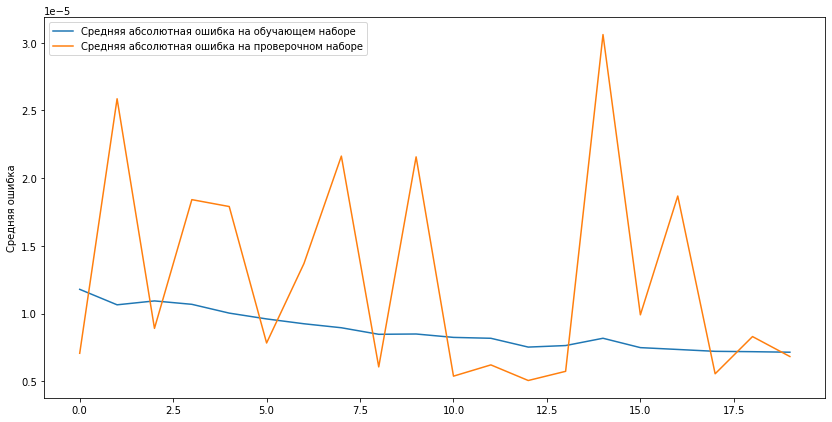

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

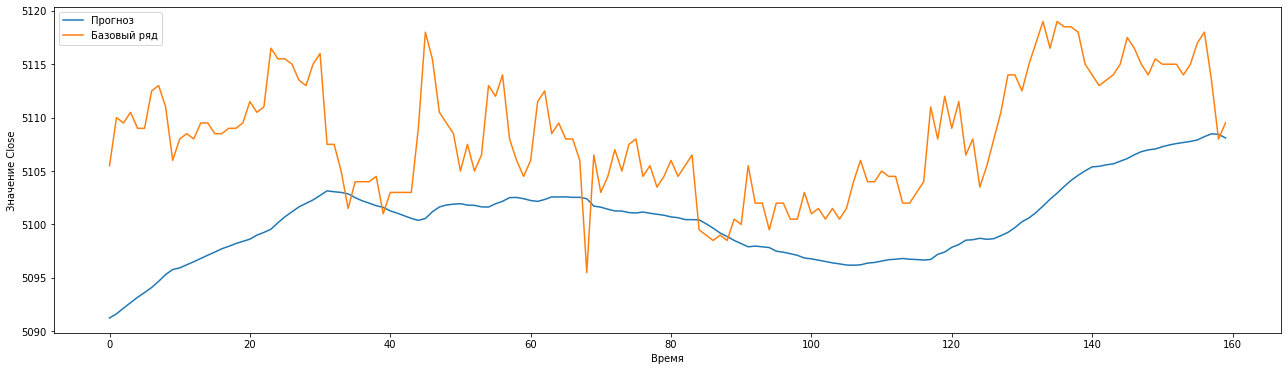

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


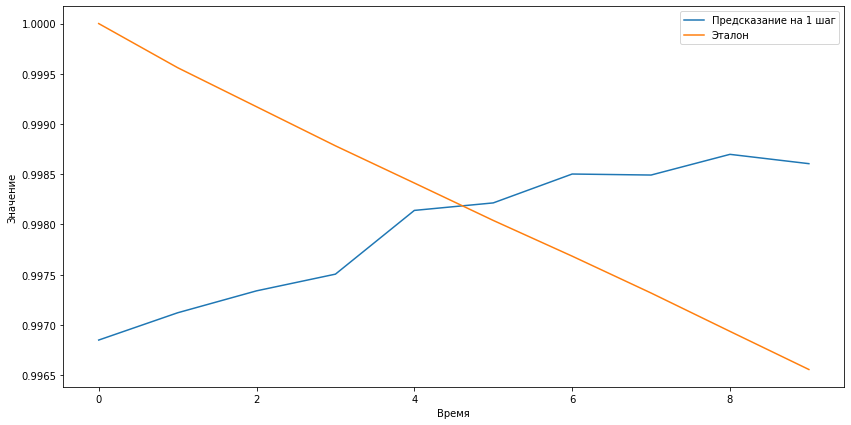

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 10, predVal, yValUnscaled)

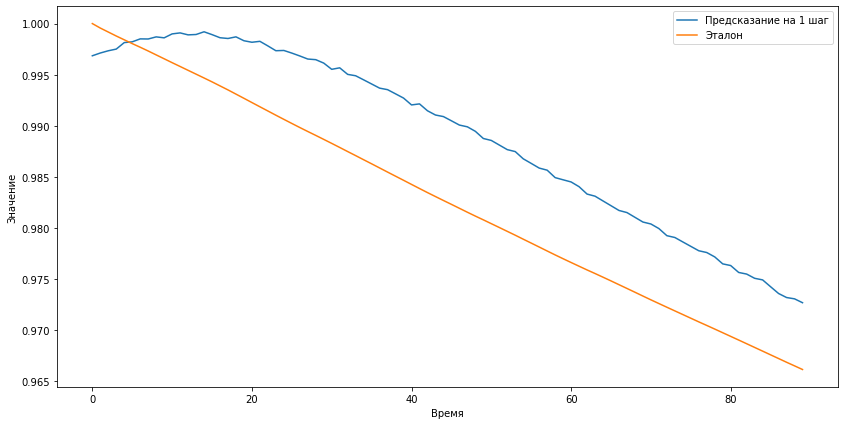

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 90, predVal, yValUnscaled)

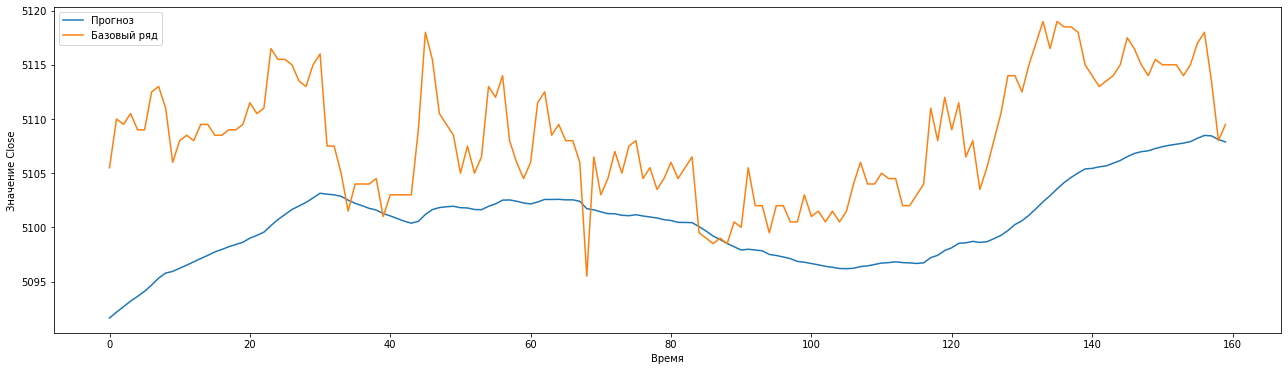

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


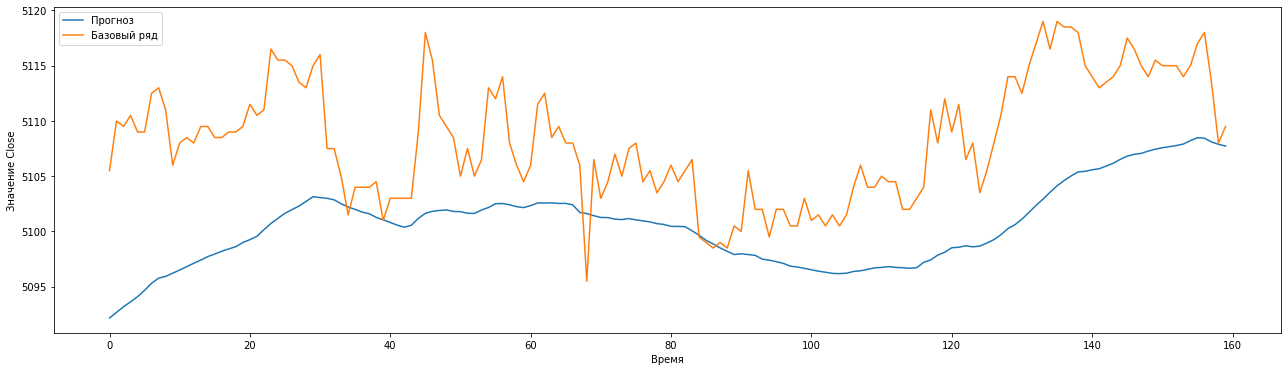

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[2:], yValUnscaled[:-2])

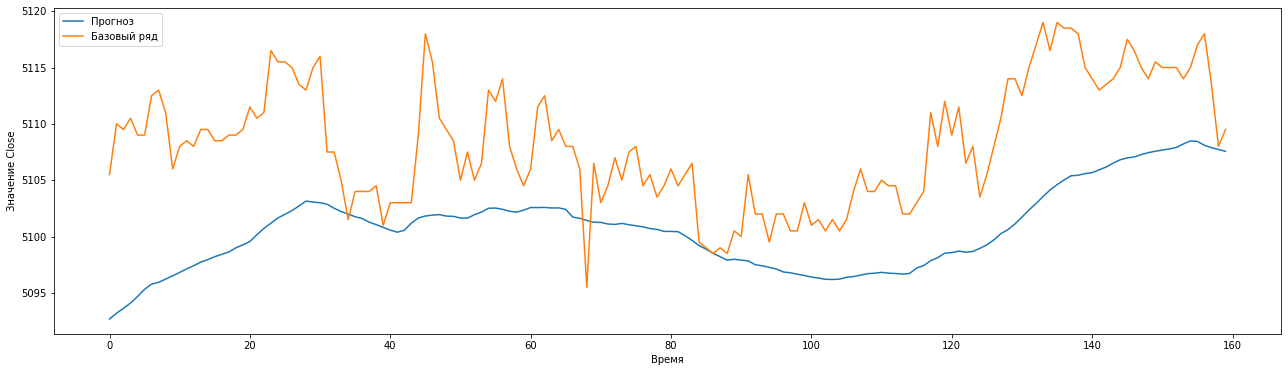

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[3:], yValUnscaled[:-3])

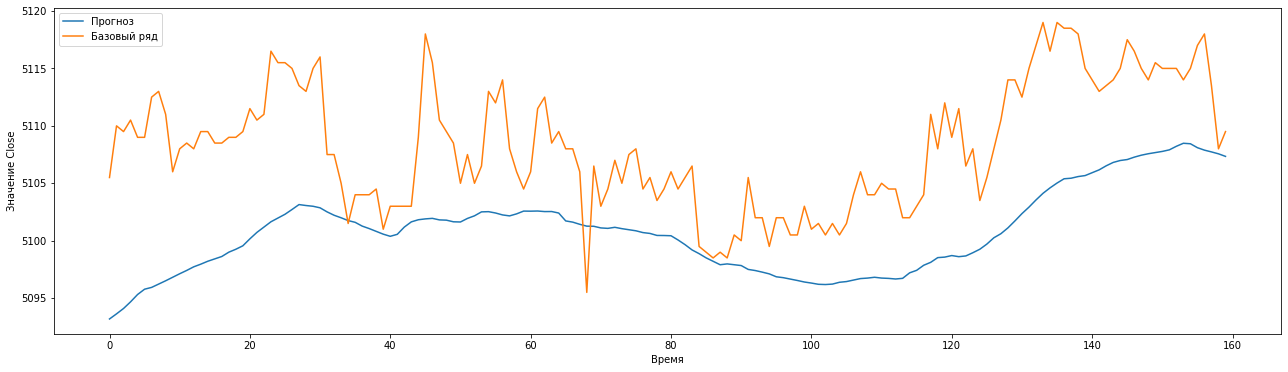

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[4:], yValUnscaled[:-4])

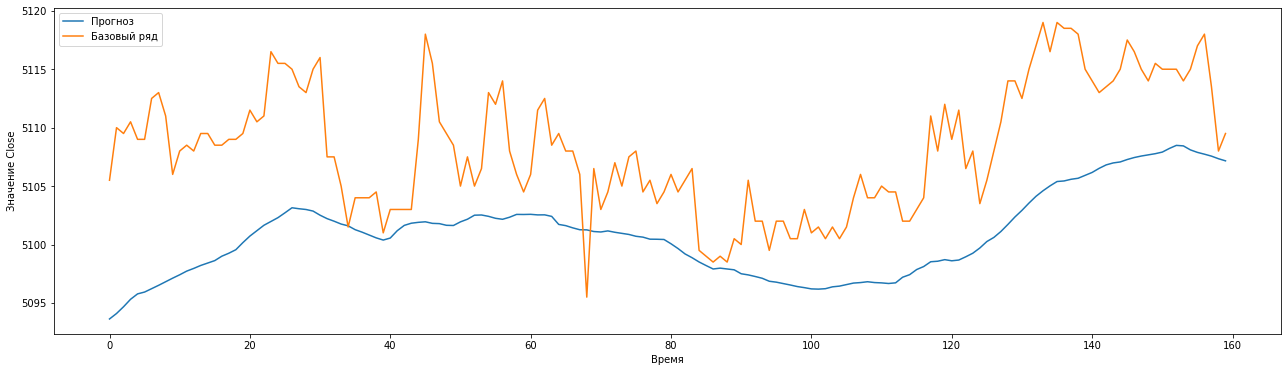

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[5:], yValUnscaled[:-5])

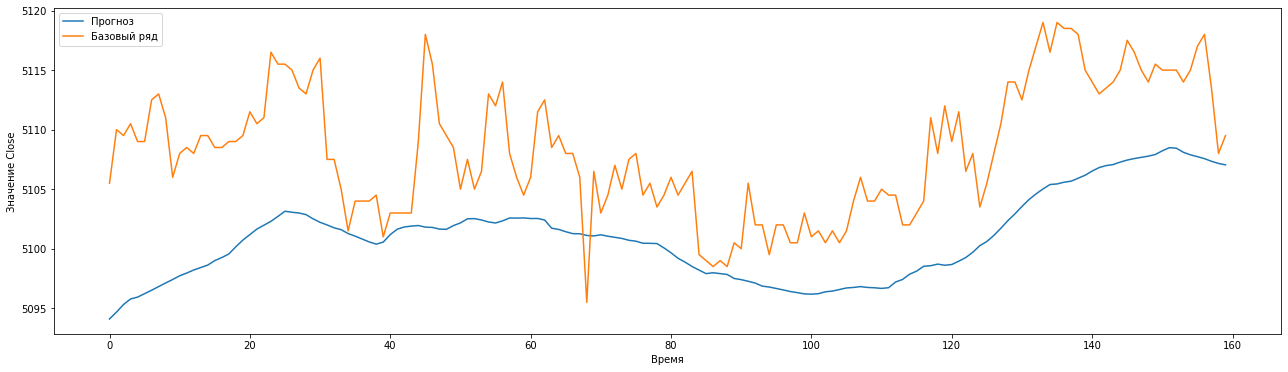

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[6:], yValUnscaled[:-6])

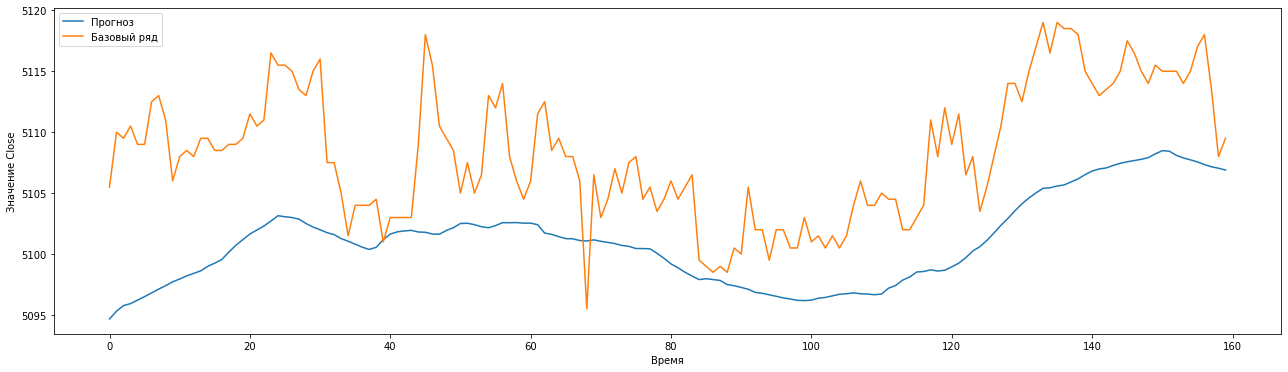

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[7:], yValUnscaled[:-7])

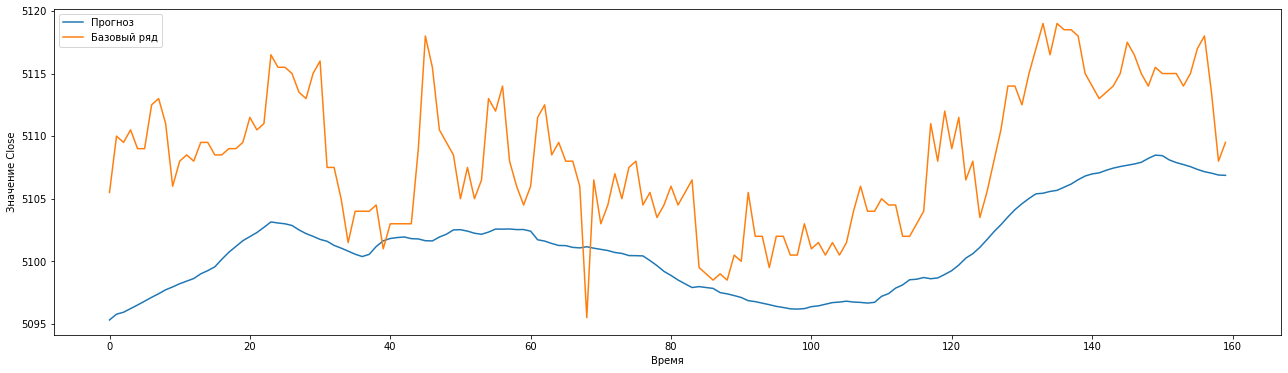

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[8:], yValUnscaled[:-8])

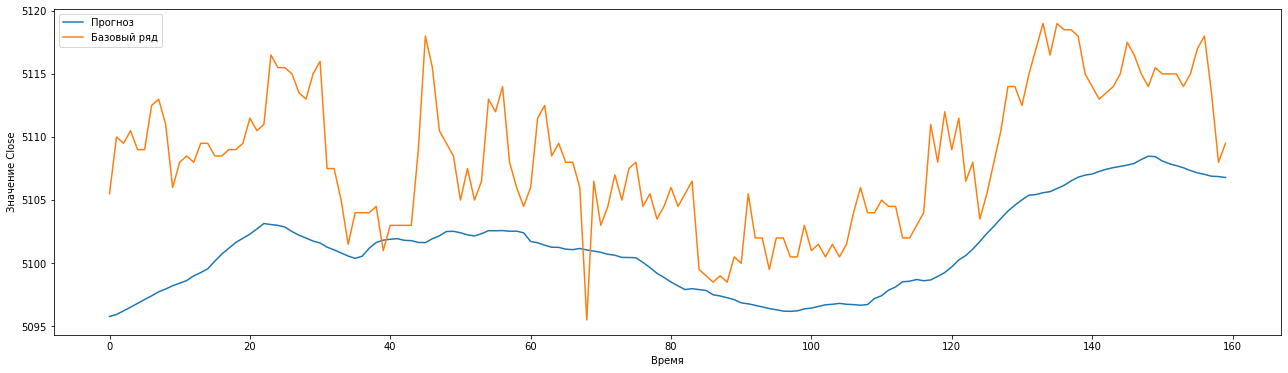

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[9:], yValUnscaled[:-9])

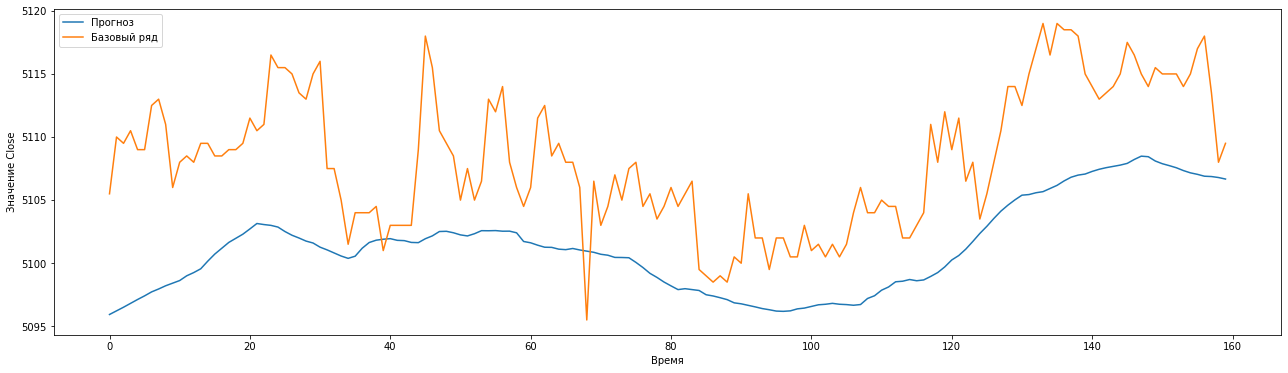

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[10:], yValUnscaled[:-10])

## Одномерная свёртка



In [ ]:
modelC = Sequential()

modelC.add(Conv1D(64, 1, input_shape = (xLen,1), activation="relu"))
modelC.add(Conv1D(64, 1, activation="relu"))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(100, activation="relu"))
modelC.add(Dense(10, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 300, 64)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 300, 64)           4160      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 100)               960100    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [ ]:
history = modelC.fit(trainDataGen,
                    epochs=20, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
22579/22579 [==============================] - 497s 22ms/step - loss: 2.0692e-04 - val_loss: 2.7158e-05
Epoch 2/20
22579/22579 [==============================] - 510s 23ms/step - loss: 5.1711e-05 - val_loss: 4.5300e-04
Epoch 3/20
22579/22579 [==============================] - 505s 22ms/step - loss: 3.5922e-05 - val_loss: 7.6065e-05
Epoch 4/20
22579/22579 [==============================] - 505s 22ms/step - loss: 2.8100e-05 - val_loss: 1.3780e-05
Epoch 5/20
22579/22579 [==============================] - 511s 23ms/step - loss: 2.5598e-05 - val_loss: 8.8118e-05
Epoch 6/20
22579/22579 [==============================] - 503s 22ms/step - loss: 2.4875e-05 - val_loss: 1.3380e-04
Epoch 7/20
22579/22579 [==============================] - 501s 22ms/step - loss: 2.1470e-05 - val_loss: 8.4059e-06
Epoch 8/20
22579/22579 [==============================] - 499s 22ms/step - loss: 1.9675e-05 - val_loss: 7.9911e-06
Epoch 9/20
22579/22579 [==============================] - 508s 22ms/step - loss:

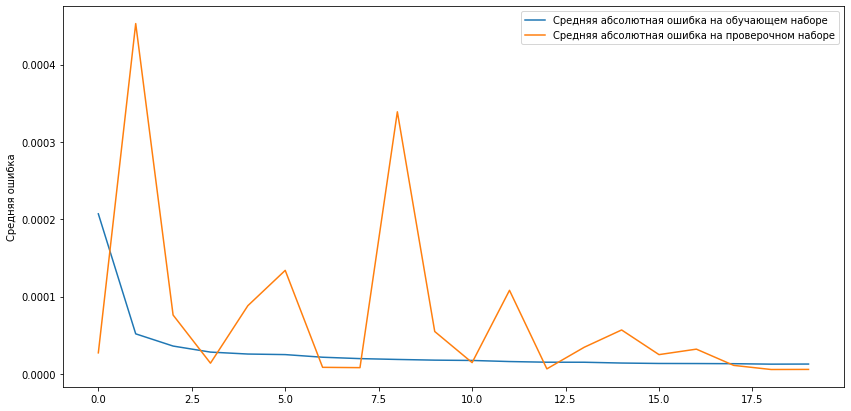

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

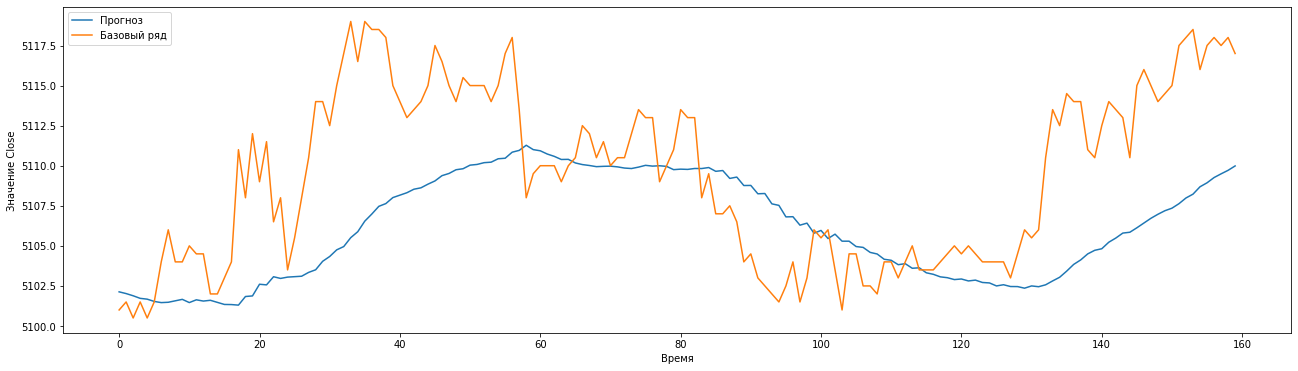

In [ ]:
#Отображаем графики
showPredict(100, 160, 0, predVal, yValUnscaled)

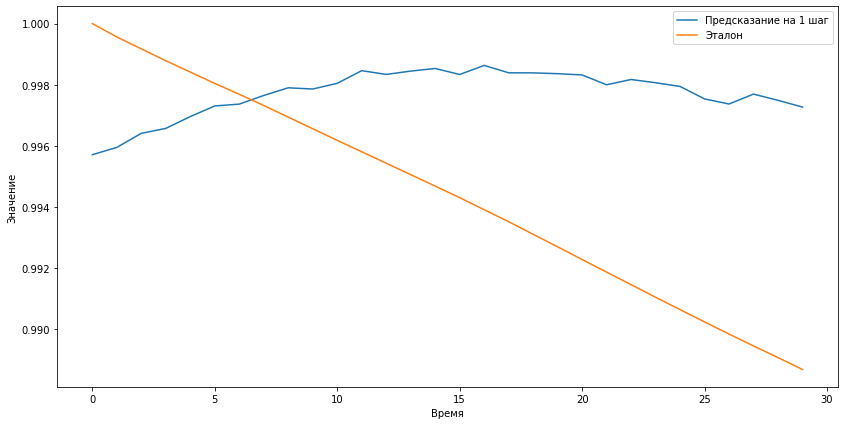

In [ ]:
#Отображаем корреляцию
showCorr([0], 30, predVal, yValUnscaled)

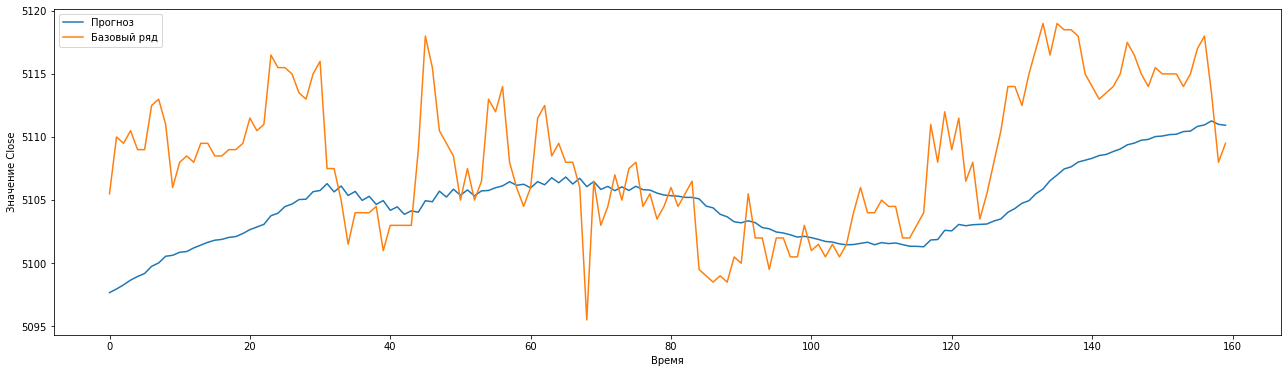

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


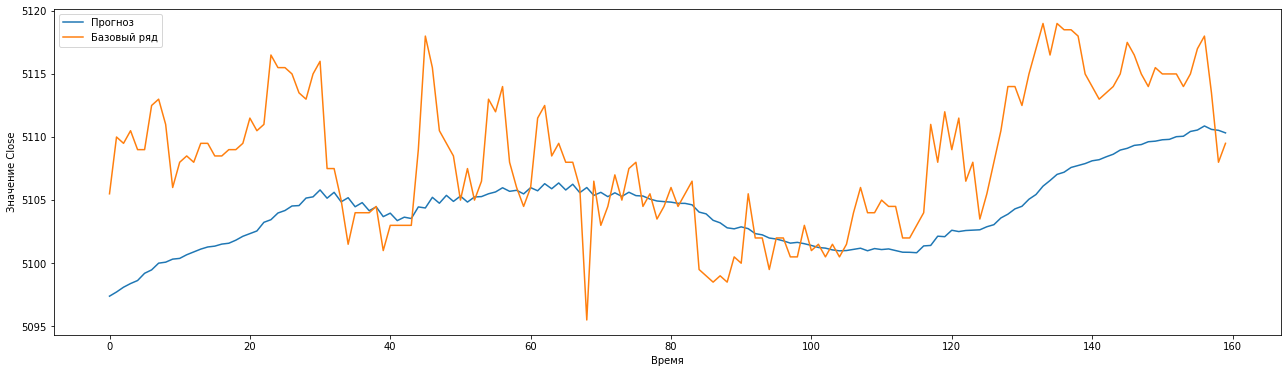

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[2:], yValUnscaled[:-2])

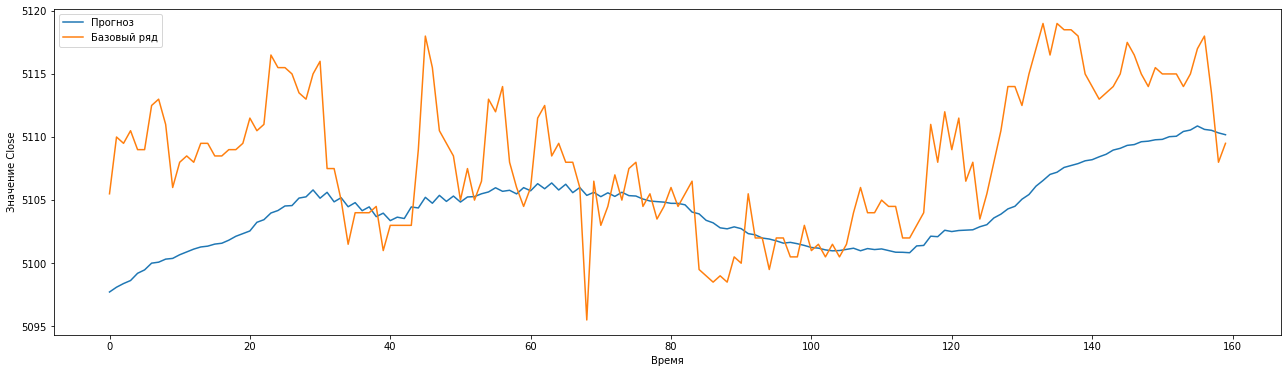

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[3:], yValUnscaled[:-3])

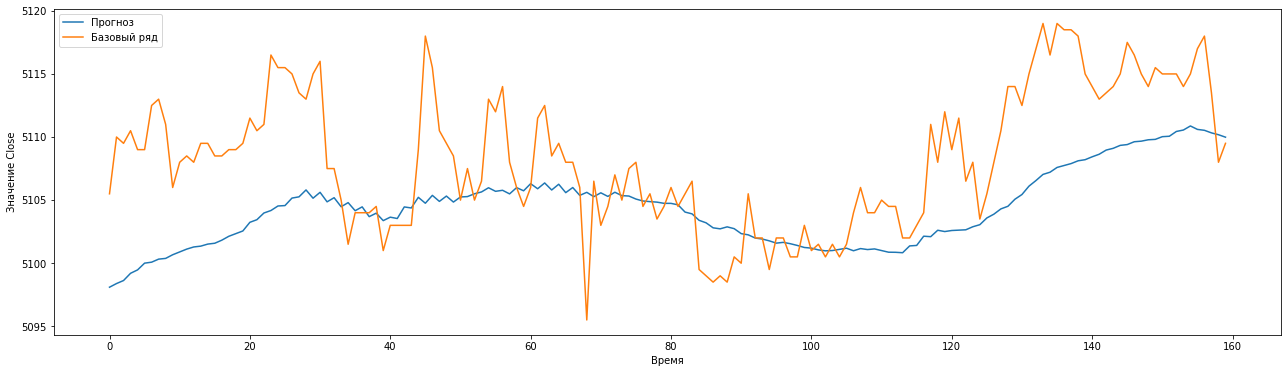

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[4:], yValUnscaled[:-4])

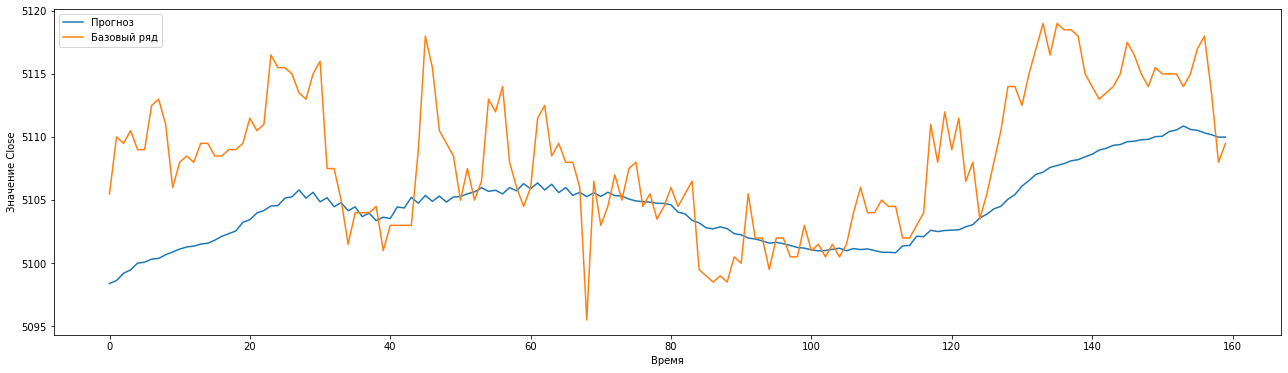

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[5:], yValUnscaled[:-5])

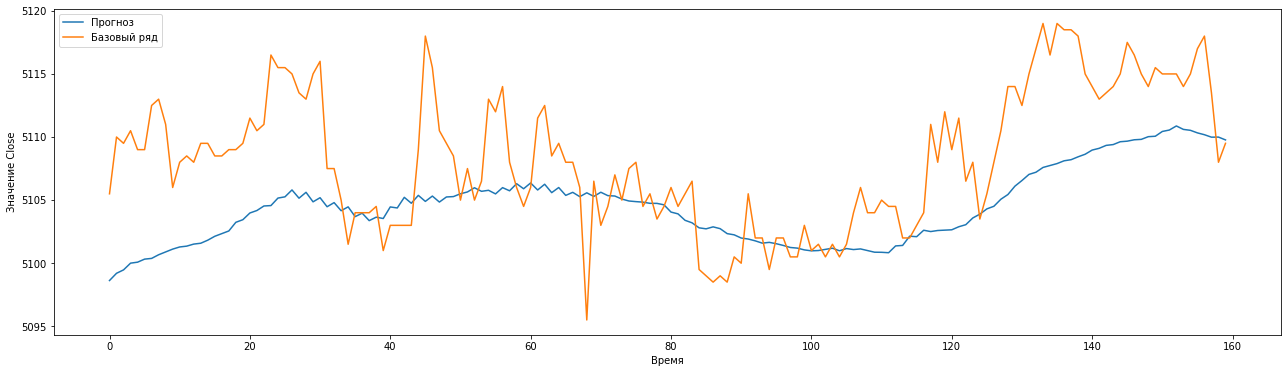

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[6:], yValUnscaled[:-6])

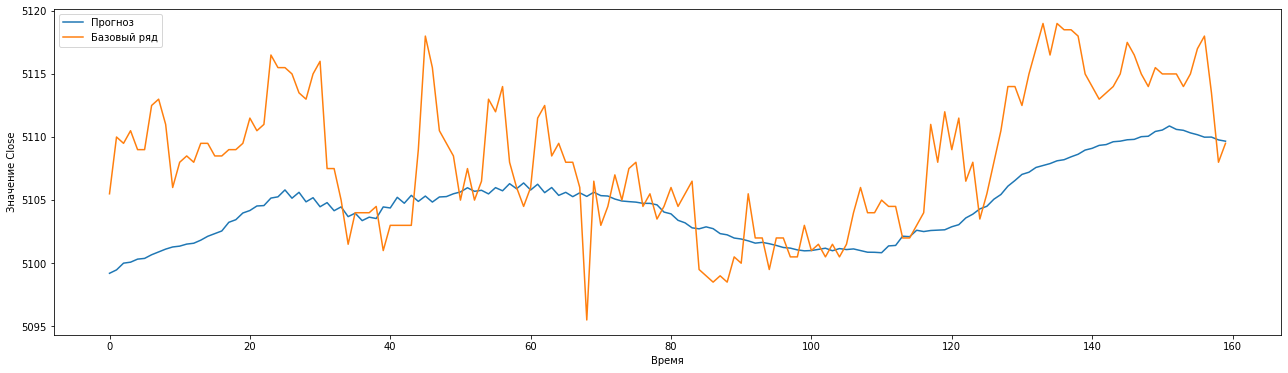

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[7:], yValUnscaled[:-7])

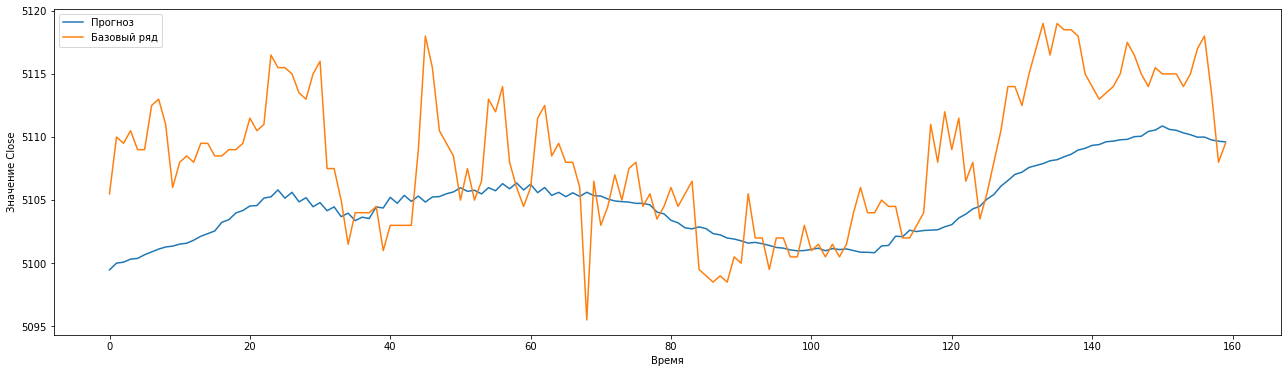

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[8:], yValUnscaled[:-8])

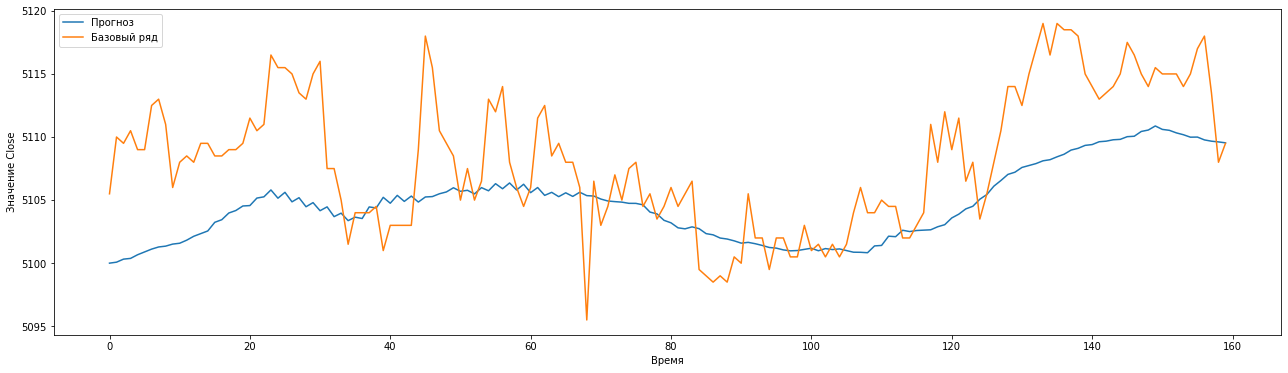

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[9:], yValUnscaled[:-9])

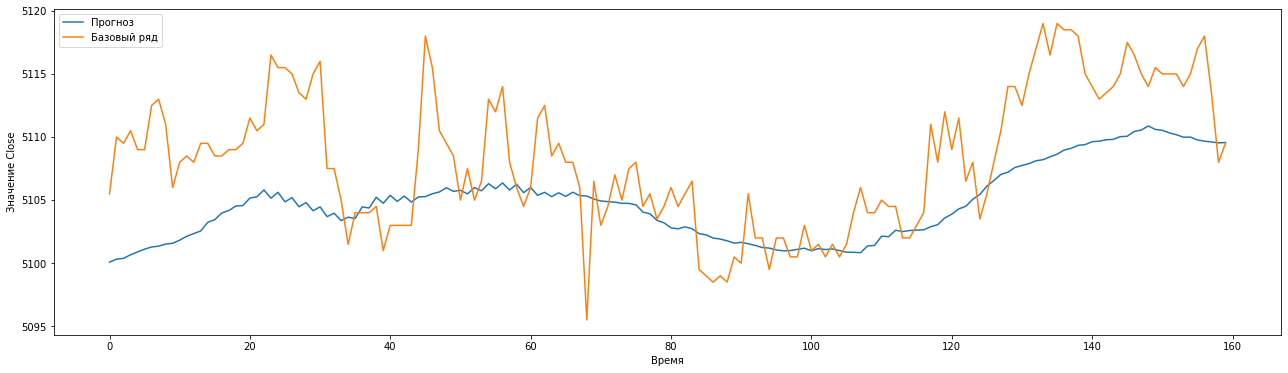

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[10:], yValUnscaled[:-10])